#  Gibbs - Every-Visit Monte Carlo Epsilon Greedy Strategy on Blackjack
This implements the Every-visit MC learning method with the constant alpha + epsilon greedy strategy method in solving the open AI Blackjack Gym environment. 



In [ ]:
#installing dependencies
#!pip install --upgrade pip
#!pip install stable-baselines3

In [1]:
#importing dependencies
import numpy as np
import gym
from collections import defaultdict
import sys
import json 
from plot_utils import plot_policy, plot_win_rate

In [2]:
#defining environment to use
env = gym.make('Blackjack-v1')


In [14]:
#Inspecting the environment to see what it contains
state = env.reset()
action_space = env.action_space.n
print(state)
print(action_space)
''''result shows we have a 3 variable tuple. row 1,column 1 gives the player sum (sum of value of the cards recieved by the player)
#, row 1, column 2 shows the displayed dealers card - value for card displayed, row 1, column 3 shows whether or not a player has a reusable ace ''' 

(8, 10, False)
2


"'result shows we have a 3 variable tuple. row 1,column 1 gives the player sum (sum of value of the cards recieved by the player)\n#, row 1, column 2 shows the displayed dealers card - value for card displayed, row 1, column 3 shows whether or not a player has a reusable ace "

In [4]:
#playing BlackJack with Random policy
for i_episode in range(4):
    state = env.reset()
    while True:
        print(state)
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        if done:
            print('Game Over! Total Reward: ', reward)
            print('You won :)\n') if reward > 0 else print('You lost :(\n')
            break

(12, 10, False)
Game Over! Total Reward:  -1.0
You lost :(

(9, 10, False)
(15, 10, False)
Game Over! Total Reward:  -1.0
You lost :(

(11, 10, False)
(21, 10, False)
Game Over! Total Reward:  1.0
You won :)

(11, 2, False)
(21, 2, False)
Game Over! Total Reward:  -1.0
You lost :(



In [5]:
# hyperparameters 
num_episodes = 1000000
epsilon = 1
epsilon_min = 0.07
gamma = 1 
alpha = 0.02

In [6]:
#initialise Q function
def monte_carlo_control(num_episodes, epsilon, epsilon_min, alpha, gamma): 
    
    # defining the Q function 
    Q = defaultdict(lambda: np.zeros(2))
    rewards_all_episodes = []
    
    # generating all of the episodes 
    for episode in range(1, num_episodes + 1): 
        epsilon = max(epsilon_min, epsilon * 0.99992)
        
        if episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(episode, num_episodes), end="")
            sys.stdout.flush()
        
        # extracting states, actions, rewards from generated episodes 
        experience = generate_episode(Q, epsilon)
        states, actions, rewards = zip(*experience)
        rewards = np.array(rewards)
        rewards_all_episodes.append(sum(rewards))
        
        
        # looping over all of the timesteps 
        for i, state in enumerate(states):
            discounts = np.array([gamma ** i for i in range(len(rewards[i: ]))])
            returns = sum(rewards[i: ] * discounts)
            
            # updating the Q_function using the monte carlo constant alpha update rule 
            Q[state][actions[i]] += alpha * (returns - Q[state][actions[i]])
            policy = dict((state, np.argmax(q_value)) for state, q_value in Q.items())
        
    return Q, policy, rewards_all_episodes

In [7]:
def generate_episode(Q, epsilon):
    state = env.reset()
    episode = []
    
    while True: 
        
        # sampling actions using the Epsilon Greedy Policy 
        action = epsilon_greedy_policy(Q, state, epsilon)
        next_state, reward, done, info = env.step(action)
        state = next_state
        episode.append((state, action, reward))
    
        if done == True:
            break
    
    return episode 

In [8]:
def epsilon_greedy_policy(Q, state, epsilon):
    probs = np.zeros(2)
    optimal_action = np.argmax(Q[state]) #capture most optimal action
    sub_optimal_action = np.abs(optimal_action - 1)  #capturing suboptimal action
    
    #define probabilities
    probs[optimal_action] = 1 - epsilon + (epsilon / 2)
    probs[sub_optimal_action] = epsilon / 2
    
    # choose an action according to the probabilites 
    action = np.random.choice(np.arange(2), p = probs)
    
    return action 

In [9]:
#test action
Q = defaultdict(lambda: np.zeros(2))
generate_episode(Q, 0.4)

[((13, 5, False), 0, 1.0)]

In [10]:
Q, policy, rewards_all_episodes = monte_carlo_control(num_episodes, epsilon, epsilon_min, alpha, gamma)

Episode 1000000/1000000.

In [11]:
#visulize the q values showing the numpy array
print(Q)
print(len(Q))

defaultdict(<function monte_carlo_control.<locals>.<lambda> at 0x000001EC3081C1F0>, {(20, 2, False): array([0.53437769, 0.50884163]), (14, 3, False): array([-0.29112365, -0.29501022]), (17, 3, False): array([-0.14029448, -0.15339478]), (21, 3, False): array([0.91960379, 0.81858968]), (19, 10, False): array([ 0.08970246, -0.04505781]), (29, 10, False): array([ 0., -1.]), (13, 10, False): array([-0.73268242, -0.58984969]), (10, 10, False): array([-0.62596602, -0.13813195]), (12, 10, False): array([-0.62592365, -0.45132769]), (9, 6, False): array([-0.09515503, -0.06484002]), (11, 6, False): array([-0.18687297,  0.42039248]), (20, 6, False): array([0.68060207, 0.62677985]), (26, 6, False): array([ 0., -1.]), (13, 8, False): array([-0.53804045, -0.19694409]), (12, 5, False): array([-0.3897733 , -0.34410146]), (20, 5, False): array([0.77451714, 0.61228392]), (9, 4, False): array([-0.12094374, -0.03063094]), (16, 4, False): array([-0.18780122, -0.18362729]), (22, 10, False): array([ 0., -1.])

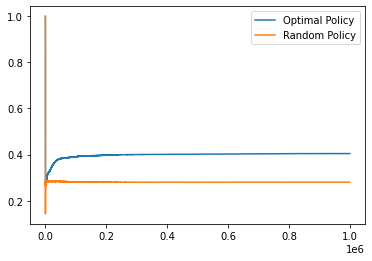

'Target win rate should be around 42% which is about 0.42'

In [12]:
# Plot win_rate
plot_win_rate(rewards_all_episodes, num_episodes)

'''Target win rate should be around 42% which is about 0.42'''

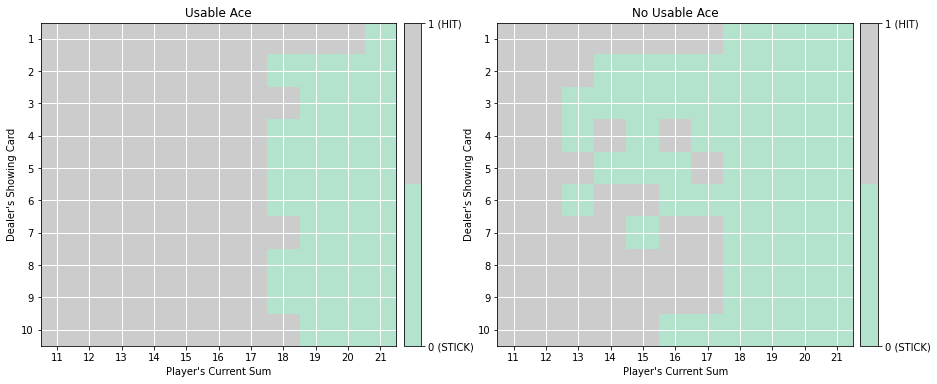

In [13]:
plot_policy(policy)

![True Optimal Policy](misc/optimal.png)
